In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

In [2]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'

In [3]:
df=pd.read_csv(url)

In [4]:
df.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0


In [5]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
df['SizeRank'].unique()

array([    0,     1,     2, ..., 28413, 28415, 28439], dtype=int64)

In [7]:
# larger city=lower rank.
large_city=df[df['SizeRank'].isin([0,1,2,3])]

In [8]:
# Id vars
id_variables=['RegionID','SizeRank','RegionName','RegionType',
              'StateName','State','Metro','CountyName']
#Melt
melted=pd.melt(large_city,id_vars=id_variables, var_name='Date',
               value_name='HomeValue')
#convert date to datetime.
melted['Date']=pd.to_datetime(melted['Date'])
#Set index
melted.set_index('Date',inplace=True)
#resample
monthly=melted.resample('M').mean(numeric_only=True)

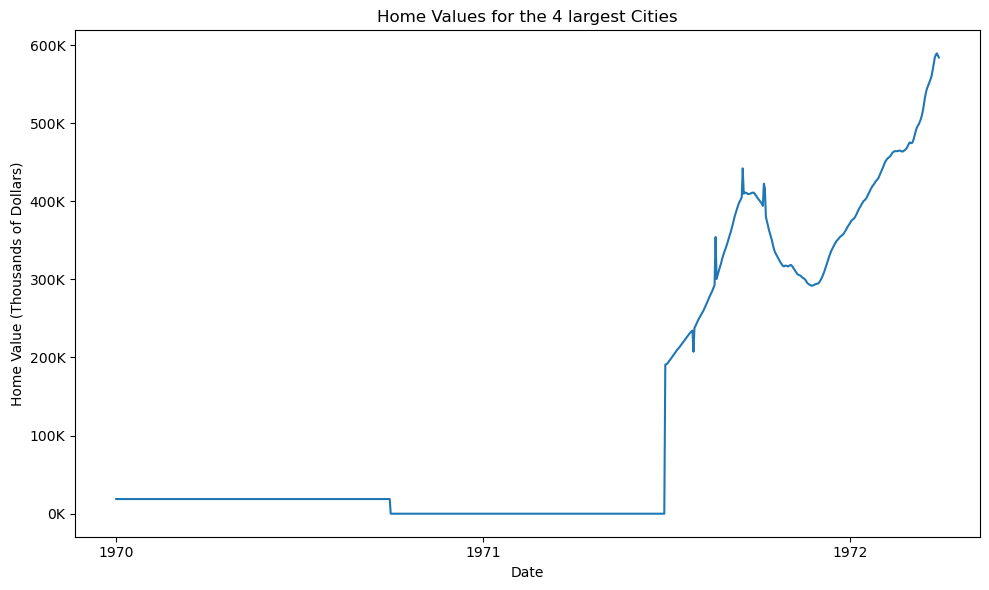

In [9]:
#Plot Values
fig,ax=plt.subplots(figsize=(10,6))
monthly.unstack().plot(ax=ax)
plt.title('Home Values for the 4 largest Cities')
plt.xlabel('Date')
plt.ylabel('Home Value (Thousands of Dollars)')
# Def format_ticks, to convert to K
def format_ticks(value,tick_number):
    return f'{value/1000:.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.tight_layout()
plt.show()

In [10]:
#Filter for 2008
dec_2008 = monthly.loc['2008-12-31']
#sort values
sorted_cities=large_city.sort_values(by='2008-12-31',ascending=False)
#iloc for highest and lowest.
highest=sorted_cities.iloc[0]['RegionName']
lowest=sorted_cities.iloc[-1]['RegionName']

# Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [11]:
print("City with the highest typical home value at the end of 2008:",highest)
print("City with the least typical home value at the end of 2008:",lowest)

City with the highest typical home value at the end of 2008: New York
City with the least typical home value at the end of 2008: Houston


# How much did the home values change from November 2008 to December 2008 (in dollars)?

In [12]:
change2008 = monthly['HomeValue'].diff(periods=1).loc['2008-12-31']
print("Change in home values from November 2008 to December 2008:",change2008)

Change in home values from November 2008 to December 2008: -5946.5
